In [14]:
import os
import string
import json
from IPython.display import Audio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa

import sklearn

import tensorflow

import transformers
from transformers import pipeline

In [7]:
train_path = '../dataset/FSD50K.dev_audio'
test_path = '../dataset/FSD50K.eval_audio'
ground_truth_path = '../dataset/FSD50K.ground_truth'
metadata_path = '../dataset/FSD50K.metadata'

In [8]:
# tring a sample audio
filepath = f'{train_path}/63.wav'
y,sr = librosa.load(filepath, sr = 22050) #default sample rate is 22050
print(f'sample rate: {sr}')
print(f'audio array shape: {y.shape}')

sample rate: 22050
audio array shape: (104704,)


In [9]:
Audio(y, rate=sr)

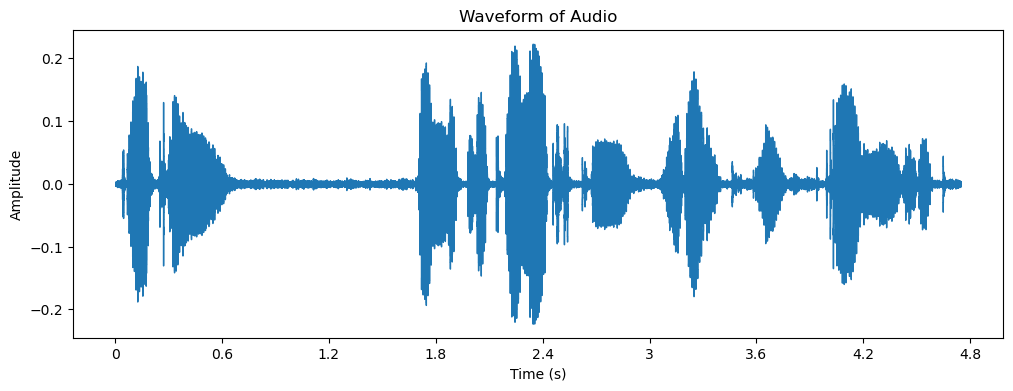

In [10]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Filtering and organising dataset
* Load and analyse the dataset

In [48]:
path = f'{ground_truth_path}/dev.csv'
train_dataset_annotation = pd.read_csv(path)

In [49]:
train_dataset_annotation

,fname,labels,mids,split
0,64760,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
1,16399,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
2,16401,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
3,16402,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
4,16404,"Electric_guitar,Guitar,Plucked_string_instrume...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
...,...,...,...,...
40961,102863,"Fowl,Livestock_and_farm_animals_and_working_an...","/m/025rv6n,/m/0ch8v,/m/0jbk",train
40962,389607,"Fowl,Livestock_and_farm_animals_and_working_an...","/m/025rv6n,/m/0ch8v,/m/0jbk",train
40963,90091,"Fowl,Livestock_and_farm_animals_and_working_an...","/m/025rv6n,/m/0ch8v,/m/0jbk",train
40964,244718,"Fowl,Livestock_and_farm_animals_and_working_an...","/m/025rv6n,/m/0ch8v,/m/0jbk",train


In [50]:
print(type(train_dataset_annotation['labels'][1]))
print(train_dataset_annotation['labels'][1])

<class 'str'>
Electric_guitar,Guitar,Plucked_string_instrument,Musical_instrument,Music


In [51]:
#  preprocessing labels for analysis
labels = train_dataset_annotation['labels']
processed_labels = []
for row in labels:
    row = row.replace('_' , ' ')
    tag_array = row.split(',')
    print(tag_array)
    processed_labels.append(tag_array)
train_dataset_annotation['labels'] = processed_labels

['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric guitar', 'Guitar', 'Plucked string instrument', 'Musical instrument', 'Music']
['Electric

In [52]:
# finding all unique tags
processed_labels = [tag for array in processed_labels for tag in array]
unique_tags = list(set(processed_labels))

In [54]:
unique_tags

['Chewing and mastication',
 'Electric guitar',
 'Guitar',
 'Thunderstorm',
 'Train',
 'Fill (with liquid)',
 'Whispering',
 'Glass',
 'Rattle',
 'Laughter',
 'Chuckle and chortle',
 'Ringtone',
 'Wood',
 'Waves and surf',
 'Meow',
 'Fire',
 'Female singing',
 'Sigh',
 'Snare drum',
 'Coin (dropping)',
 'Bird vocalization and bird call and bird song',
 'Toilet flush',
 'Bicycle',
 'Doorbell',
 'Boat and Water vehicle',
 'Bicycle bell',
 'Human group actions',
 'Crow',
 'Camera',
 'Chicken and rooster',
 'Shout',
 'Speech synthesizer',
 'Packing tape and duct tape',
 'Chink and clink',
 'Fireworks',
 'Female speech and woman speaking',
 'Glockenspiel',
 'Sink (filling or washing)',
 'Aircraft',
 'Cat',
 'Splash and splatter',
 'Strum',
 'Motor vehicle (road)',
 'Scissors',
 'Purr',
 'Piano',
 'Crying and sobbing',
 'Pour',
 'Hi-hat',
 'Burping and eructation',
 'Drum',
 'Computer keyboard',
 'Finger snapping',
 'Ocean',
 'Plucked string instrument',
 'Chirp and tweet',
 'Wind instrument

In [55]:
if not os.path.exists('datasets'):
    os.makedirs('datasets')
train_dataset_annotation.to_csv('datasets/dataset_annotation.csv',index=False)

In [56]:
unique_tags_dataframe = pd.DataFrame({'Categories':unique_tags})
unique_tags_dataframe.to_csv('datasets/unique_tags_list.csv',index=False)

**Relevant tags found:**
* human group actions
* human voice
* Speech synthesizer
* Female speech and woman speaking
* Child speech and kid speaking
* Male speech and man speaking
* Speech

In [57]:
train_dataset_annotation

,fname,labels,mids,split
0,64760,"[Electric guitar, Guitar, Plucked string instr...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
1,16399,"[Electric guitar, Guitar, Plucked string instr...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
2,16401,"[Electric guitar, Guitar, Plucked string instr...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
3,16402,"[Electric guitar, Guitar, Plucked string instr...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
4,16404,"[Electric guitar, Guitar, Plucked string instr...","/m/02sgy,/m/0342h,/m/0fx80y,/m/04szw,/m/04rlf",train
...,...,...,...,...
40961,102863,"[Fowl, Livestock and farm animals and working ...","/m/025rv6n,/m/0ch8v,/m/0jbk",train
40962,389607,"[Fowl, Livestock and farm animals and working ...","/m/025rv6n,/m/0ch8v,/m/0jbk",train
40963,90091,"[Fowl, Livestock and farm animals and working ...","/m/025rv6n,/m/0ch8v,/m/0jbk",train
40964,244718,"[Fowl, Livestock and farm animals and working ...","/m/025rv6n,/m/0ch8v,/m/0jbk",train


In [58]:
targeted_labels = ['Human group actions' , 'Human voice' , 'Speech synthesizer' , 'Female speech and woman speaking' , 'Child speech and kid speaking' , 'Male speech and man speaking' , 'Speech']
targeted_ids = []
for id,labels in zip(train_dataset_annotation['fname'] , train_dataset_annotation['labels']):
    for label in labels:
        if label in targeted_labels:
            targeted_ids.append(id)

In [60]:
train_dataset_targeted_ids = pd.DataFrame({'id':targeted_ids})
train_dataset_targeted_ids.to_csv('datasets/train_dataset_targeted_ids.csv',index=False)

In [5]:
import json
path = r'..\dataset\Chime-6\transcriptions\dev\S02.json'
with open(path,"r") as file :
    data = json.load(file)
data

[{'end_time': '00:00:43.82',
  'start_time': '00:00:40.60',
  'words': "[laughs] It's the blue, I think. I think.",
  'speaker': 'P05',
  'ref': 'U02',
  'location': 'kitchen',
  'session_id': 'S02'},
 {'end_time': '00:01:12.97',
  'start_time': '00:01:10.11',
  'words': 'Okay. [laughs]',
  'speaker': 'P05',
  'ref': 'U02',
  'location': 'kitchen',
  'session_id': 'S02'},
 {'end_time': '00:01:16.34',
  'start_time': '00:01:13.50',
  'words': "Let's do lunch. [laughs]",
  'speaker': 'P08',
  'ref': 'U02',
  'location': 'kitchen',
  'session_id': 'S02'},
 {'end_time': '00:01:15.88',
  'start_time': '00:01:14.00',
  'words': "Let's do lunch!",
  'speaker': 'P06',
  'ref': 'U02',
  'location': 'kitchen',
  'session_id': 'S02'},
 {'end_time': '00:01:19.08',
  'start_time': '00:01:14.37',
  'words': "[laughs] Okay, so here's the pie.",
  'speaker': 'P05',
  'ref': 'U02',
  'location': 'kitchen',
  'session_id': 'S02'},
 {'end_time': '00:01:23.32',
  'start_time': '00:01:19.43',
  'words': 'C